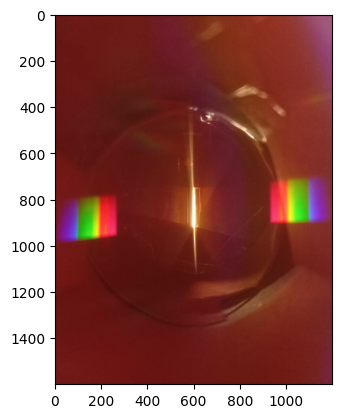

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("cielo.jpg")
plt.imshow(img)

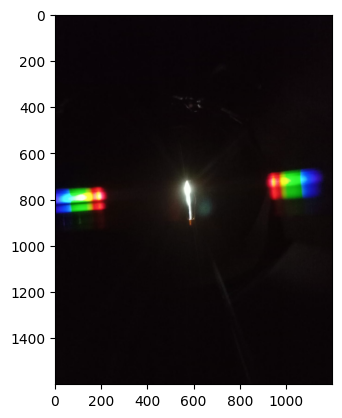

In [7]:
img2= cv2.imread("luz_incandcnt.jpg")
plt.imshow(img2)

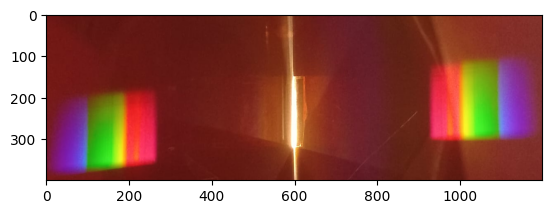

In [9]:

# Define the portion of the image to analyze
x1, y1, x2, y2 = (0, 600, -1, 1000) 
roi = img[y1:y2, x1:x2]
plt.imshow(roi)


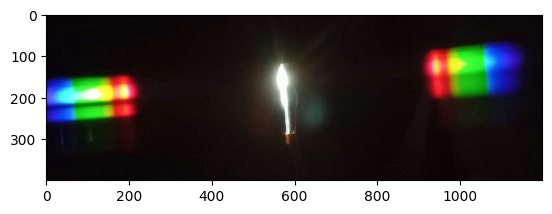

In [19]:

# Define the portion of the image to analyze
x1, y1, x2, y2 = (0, 600, -1, 1000) 
roi2 = img2[y1:y2, x1:x2]
plt.imshow(roi2)

In [27]:
type(roi)

numpy.ndarray

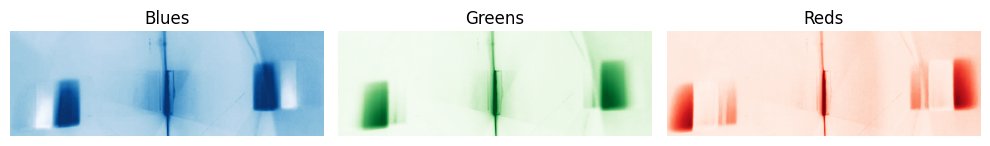

In [26]:
b,g,r = cv2.split(roi)
colormaps = ['Blues', 'Greens', 'Reds']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))  # Adjust figsize for better visualization

# Display image b in the first subplot
axes[0].imshow(b, cmap=plt.get_cmap(colormaps[0]))
axes[0].set_title('Blues')
axes[0].axis('off') 

axes[1].imshow(g, cmap=plt.get_cmap(colormaps[1]))
axes[1].set_title('Greens')
axes[1].axis('off')


axes[2].imshow(r, cmap=plt.get_cmap(colormaps[2]))
axes[2].set_title('Reds')
axes[2].axis('off')

# Show the entire figure with all subplots
plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()

array([[18, 18, 18, ..., 41, 42, 42],
       [18, 18, 18, ..., 42, 42, 42],
       [18, 18, 18, ..., 42, 42, 43],
       ...,
       [22, 21, 21, ..., 34, 35, 36],
       [22, 22, 21, ..., 33, 34, 35],
       [23, 22, 21, ..., 31, 33, 34]], dtype=uint8)

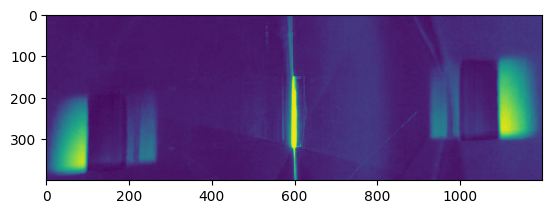

In [65]:
norm_b = cv2.normalize(b, None, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX)
norm_g = cv2.normalize(g, None, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX)
norm_r = cv2.normalize(r, None, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX)

plt.imshow(norm_r)
norm_r

In [73]:
np.mean(r)

38.79138031693078

In [72]:
np.mean(norm_r)

36.23720183486238

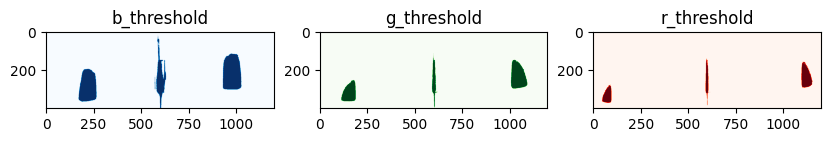

In [66]:
lb = 255 * .7

_, b_threshold = cv2.threshold(norm_b, lb, 255, cv2.THRESH_BINARY)
_, g_threshold = cv2.threshold(norm_g, lb, 255, cv2.THRESH_BINARY)
_, r_threshold = cv2.threshold(norm_r, lb, 255, cv2.THRESH_BINARY)


fig, axes = plt.subplots(1, 3, figsize=(10, 4)) 

axes[0].imshow(b_threshold, cmap=plt.get_cmap(colormaps[0]))
axes[1].imshow(g_threshold, cmap=plt.get_cmap(colormaps[1]))
axes[2].imshow(r_threshold, cmap=plt.get_cmap(colormaps[2]))

axes[0].set_title('b_threshold')
axes[1].set_title('g_threshold')
axes[2].set_title('r_threshold')

#axes[1].axis('off')
plt.show()